#####  **Import Required Libraries**

In [610]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#####  **Load Data**

In [619]:
file_path = "../resources/data/output/online_retail_cleaned.csv"   
df = pd.read_csv(file_path)

In [620]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [621]:
df.shape

(392732, 8)

#####  **Descriptive Statistics**

In [623]:
# Calculate descriptive statistics for numerical attributes Quantity and UnitPrice
descriptive_stats = df.drop(
    columns=['CustomerID', 'InvoiceNo']
).describe()

descriptive_stats


,Quantity,UnitPrice
count,392732.000000,392732.000000
mean,13.153718,3.125596
std,181.588420,22.240725
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


The business handled 392,732 total transactions

**Quantity Analysis:**
- The typical order is 6 units (median), with most orders falling between 2-12 units
- While the average is 13.15 units, there's high variability with some extreme cases reaching up to 80,995 units
- Prices align with quantity, both having an average of **$13.15**, indicating high variation.
- Quantities range from **1 unit** to **80,995 units**, revealing significant outliers.

**Unit Pricing:**

- The average unit price is $3.13
- The median price is $1.95, with 50% of prices falling between $1.25 and $3.75
- There's significant price variation (standard deviation of $22.24)
- Prices range from $0 to $8,142.75, indicating extreme outliers in the high-end pricing

**Check Quantity and UnitPrice with zero**

In [584]:
# entries with UnitPrice equal to 0
print("Number of entries with UnitPrice equal to 0:", df[df['UnitPrice'] == 0].shape[0])


Number of entries with Quantity equal to 0: 0
Number of entries with UnitPrice equal to 0: 40


**Remove UnitPrice equal to 0**

In [624]:
# Filter the DataFrame to exclude entries where UnitPrice is zero.
# This ensures data quality by removing likely erroneous or irrelevant entries,
# which may arise from incorrect data entry or incomplete transactions.
# Such entries could skew the analysis, leading to inaccurate insights
# into pricing and purchasing patterns. By focusing on transactions with
# non-zero prices, we maintain statistical integrity and derive more 
# meaningful business insights regarding typical operations.

df = df[df['UnitPrice'] != 0]


In [625]:
def plot_scatter(data, y_column, title='Scatter Plot', x_column=None):
    """Create a scatter plot for a specified column to identify outliers."""
    
    plt.figure(figsize=(10, 6))
    
    if x_column is not None:
        sns.scatterplot(x=x_column, y=y_column, data=data)
    else:
        sns.scatterplot(x=data.index, y=y_column, data=data)
    
    plt.title(title)
    plt.xlabel(x_column if x_column else 'Index')
    plt.ylabel(y_column)
    plt.show()


**Scatter plots for outlier detection** 

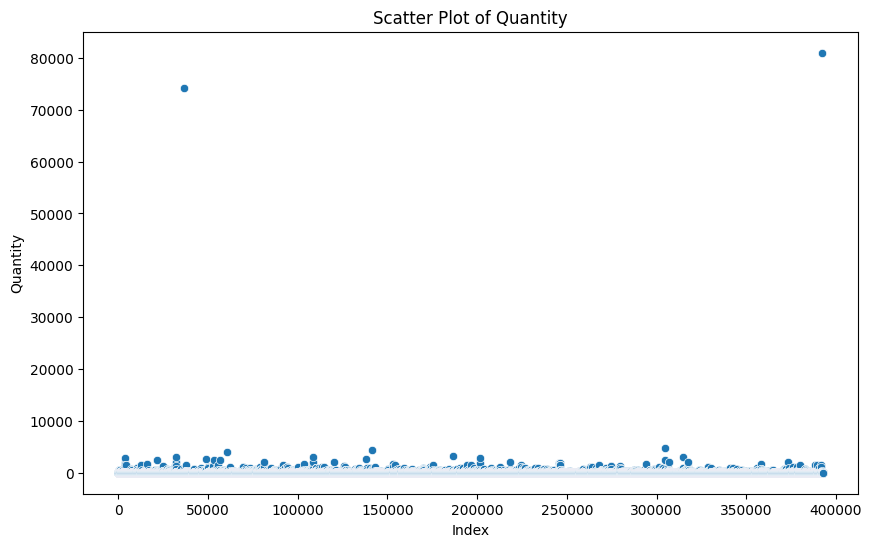

In [626]:
plot_scatter(df, 'Quantity', 'Scatter Plot of Quantity')

Based on the scatter plot of Quantity vs Index, here are the key observations:

- The majority of transactions have quantities clustered in the lower range (0-5,000 units), forming a dense band near the bottom of the plot
- There are two notable outliers:
    - One transaction with approximately 73,000 units
    - Another transaction reaching about 80,000 units
- The pattern shows:
    - A very consistent baseline of small-to-medium quantity orders
    - Occasional spikes in order quantity
    - No clear trend over time (index) suggesting stable ordering patterns

This distribution indicates that while most transactions are relatively small, the business occasionally handles extremely large bulk orders that are significant outliers from the normal pattern.

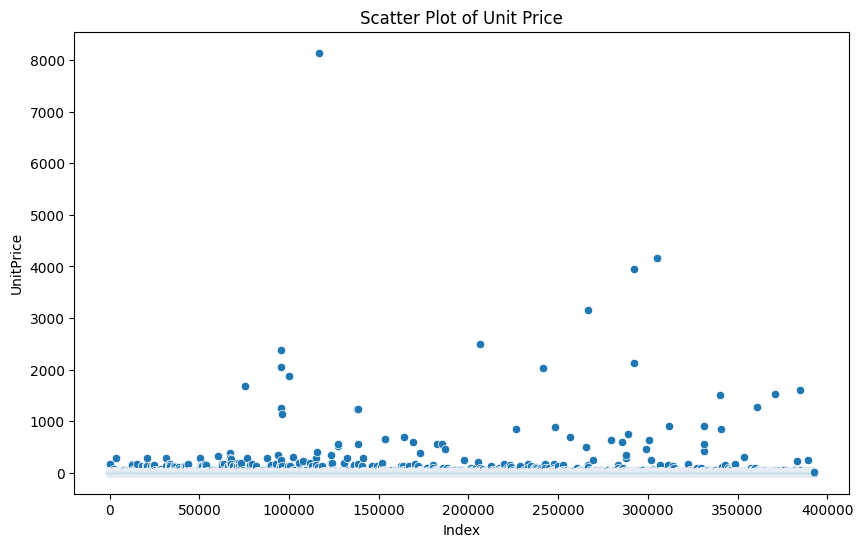

In [588]:
plot_scatter(df, 'UnitPrice', 'Scatter Plot of Unit Price')

Based on the scatter plot of Unit Price vs Index, here are the key patterns:

- The majority of unit prices are concentrated in the lower range (0-500), forming a dense band at the bottom of the plot
- Notable price points include:
    - A significant outlier around 8,000
    - Several transactions between 2,000-4,000
    - Most transactions clustered below 1,000
- Distribution characteristics:
    - Very consistent baseline of low-to-medium priced items
    - Occasional spikes in unit prices
    - No clear trend over time (index) suggesting stable pricing patterns

This distribution indicates that while most transactions have relatively low unit prices, there are occasional high-value items that significantly deviate from the typical pricing pattern.

In [627]:
def create_total_price(data):
    """Create a new column 'TotalPrice' by multiplying 'Quantity' and 'UnitPrice'."""
    data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
    return data


**Total Price Column in Outlier Detection**

- **Combined Insight**: `total_price` (as `quantity * unit_price`) captures anomalies in sales transactions more effectively than individual columns.

- **Contextual Clarity**: Provides direct monetary impact, making it easier to spot irregularities that may not be apparent from `quantity` or `unit_price` alone.

- **Holistic View**: Balances both factors, revealing true outliers related to financial implications rather than isolated data points.

- **Enhanced Anomaly Identification**: Highlights significant business events, errors, or fraud that might be missed when analyzing columns separately.

In [628]:
# Calculate total price for each row in the DataFrame 'df' and store the result in 'df_with_total_price'
df_with_total_price = create_total_price(df)

print(df_with_total_price.shape)

df_with_total_price.head()


(392692, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [631]:
df_with_total_price.drop(columns=['CustomerID', 'InvoiceNo']).describe()

,Quantity,UnitPrice,TotalPrice
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,22.631500
std,180.492832,22.241836,311.099224
min,1.000000,0.001000,0.001000
25%,2.000000,1.250000,4.950000
50%,6.000000,1.950000,12.450000
75%,12.000000,3.750000,19.800000
max,80995.000000,8142.750000,168469.600000


**Total Price Analysis**
- Average total price is $22.63, but there's very high variability (standard deviation: $311.10)
- Most transactions are moderate in value:
    - Median (50th percentile): $12.45
    - 25th percentile: $4.95
    - 75th percentile: $19.80
- Minimum transaction: $0.001
- Maximum transaction: $168,469.60, indicating some extremely high-value orders

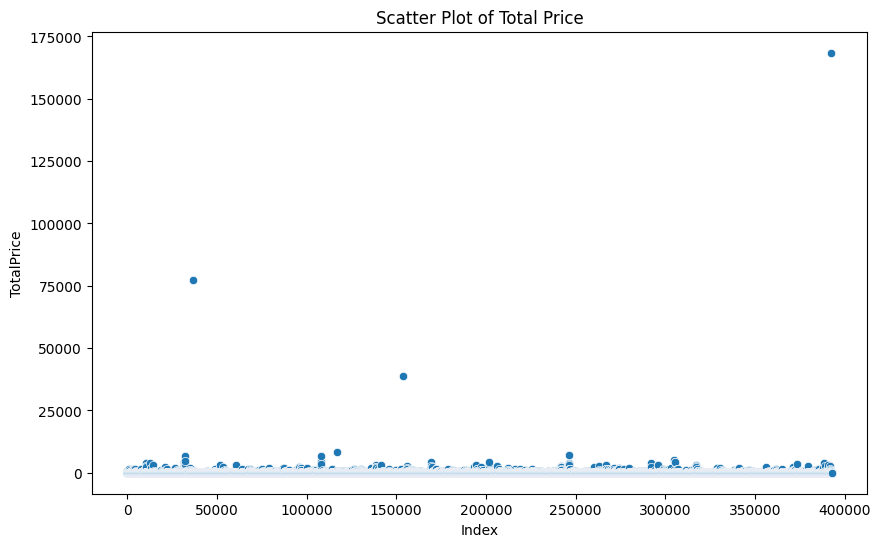

In [632]:
plot_scatter(df_with_total_price, 'TotalPrice', 'Scatter Plot of Total Price')

Based on the scatter plot of Total Price vs Index, here are the key observations:

- The majority of transactions have total prices clustered in the lower range (0-10,000 currency units), forming a dense band near the bottom of the plot
- There are three notable outliers:
    - One transaction reaching approximately 168,000 currency units
    - One transaction around 75,000 currency units
    - One transaction near 40,000 currency units
- The pattern shows:
    - A very consistent baseline of low-to-medium value transactions
    - Occasional spikes in total price
    - No clear trend over time (index) suggesting stable pricing patterns

In [642]:
# Filter transactions where 'TotalPrice' exceeds 25000 to identify potential outliers, focusing on these for analysis.
# Retrieve associated CustomerIDs for further investigation of high-value transactions.
outlier_customer_ids = df_with_total_price[df_with_total_price['TotalPrice'] > 25000]
outlier_customer_ids

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
36527,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
153601,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-10-06 15:28:00,649.50,15098.0,United Kingdom,38970.0
392266,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-09-12 09:15:00,2.08,16446.0,United Kingdom,168469.6


In [644]:
print(outlier_customer_ids['CustomerID'])

36527     12346.0
153601    15098.0
392266    16446.0
Name: CustomerID, dtype: float64


In [646]:

df_with_total_price[df_with_total_price['CustomerID'].isin([12346, 15098, 16446])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
36527,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60
132156,553573,22980,PANTRY SCRUBBING BRUSH,1,2011-05-18 09:52:00,1.65,16446.0,United Kingdom,1.65
132157,553573,22982,PANTRY PASTRY BRUSH,1,2011-05-18 09:52:00,1.25,16446.0,United Kingdom,1.25
153591,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-10-06 15:22:00,4.95,15098.0,United Kingdom,297.00
153601,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-10-06 15:28:00,649.50,15098.0,United Kingdom,38970.00
153602,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-10-06 15:33:00,649.50,15098.0,United Kingdom,649.50
392266,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-09-12 09:15:00,2.08,16446.0,United Kingdom,168469.60


1. **Extreme Monetary Values**: The records associated with Customer IDs 12346, 15098, and 16446 exhibit exceptionally high total prices (e.g., over 77,000 and 168,000). These outlier values can disproportionately influence the results of the RFM analysis, leading to misleading interpretations of customer behavior.

2. **Distortion of RFM Metrics**: Including such high-value transactions can skew the Monetary score in the RFM analysis, causing other customers with more typical spending patterns to be undervalued. This may result in inaccurate segmentation and ineffective marketing strategies that do not target the right customer segments.

3. **Non-representative Purchases**: The nature of these transactions may not reflect standard purchasing behavior within the dataset. They could be one-time bulk purchases or unusual transactions that do not represent the average customer's purchasing habits.

4. **Focus on Typical Customer Behavior**: By removing these skewed records, the analysis will provide a clearer picture of regular customer behavior, enabling more meaningful segmentation and tailored marketing efforts.

5. **Improved Clarity**: Excluding these records enhances the clarity of the RFM analysis, allowing for a more accurate representation of customer value and loyalty, which can lead to more effective business decisions.

In [648]:
# Print the number of records before filtering
print(f"Number of records before removing outliers: {df_with_total_price.shape[0]}")

# Remove extreme monetary values (for example, greater than 25000)
df_final = df_with_total_price[df_with_total_price['TotalPrice'] <= 25000]

# Print the number of records after filtering
print(f"Number of records after removing outliers: {df_final.shape[0]}")


Number of records before removing outliers: 392692
Number of records after removing outliers: 392689


In [651]:
df_final.drop(columns=['CustomerID', 'InvoiceNo']).describe()

,Quantity,UnitPrice,TotalPrice
count,392689.000000,392689.000000,392689.000000
mean,12.724400,3.124276,21.906867
std,43.083634,22.217990,74.172664
min,1.000000,0.001000,0.001000
25%,2.000000,1.250000,4.950000
50%,6.000000,1.950000,12.450000
75%,12.000000,3.750000,19.800000
max,4800.000000,8142.750000,8142.750000


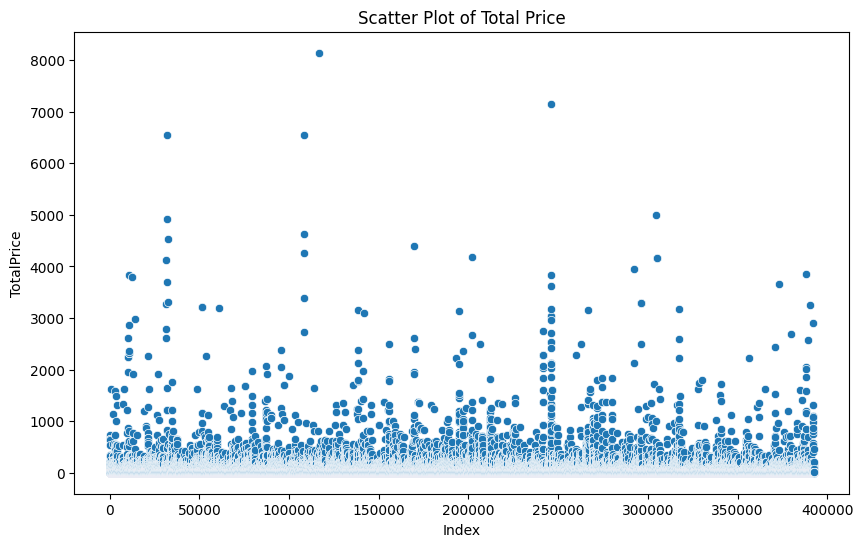

In [652]:
plot_scatter(df_final, 'TotalPrice', 'Scatter Plot of Total Price')

After outlier removal, the scatter plot shows a much clearer distribution of total prices:

- The data points are now concentrated in a more reasonable range, with the majority of transactions falling below 10,000 currency units
- The visualization reveals a more natural pattern of transaction values without the extreme outliers that were previously skewing the distribution
- The pattern now shows:
    - A dense concentration of transactions in the 0-5,000 range
    - A gradual thinning of points as values increase showing that higher-value transactions are less frequent but still valid data points.
    - A more consistent and interpretable spread of data points across the time index


#### **Write output for RFM Analysis**

In [655]:
df_final.to_csv('../resources/data/output/online_retail_kmeans.csv', index=False)